# IMPORT

## import library

In [69]:
import pandas as pd
import numpy as np
import scipy.stats as st
import warnings
warnings.filterwarnings('ignore')

## Visualization library
import matplotlib.pyplot as plt
import seaborn as sns

## import dataset

In [70]:
df = pd.read_csv('SBAnational.csv', low_memory=False)

In [71]:
df.isna().sum()

LoanNr_ChkDgt             0
Name                     14
City                     30
State                    14
Zip                       0
Bank                   1559
BankState              1566
NAICS                     0
ApprovalDate              0
ApprovalFY                0
Term                      0
NoEmp                     0
NewExist                136
CreateJob                 0
RetainedJob               0
FranchiseCode             0
UrbanRural                0
RevLineCr              4528
LowDoc                 2582
ChgOffDate           736465
DisbursementDate       2368
DisbursementGross         0
BalanceGross              0
MIS_Status             1997
ChgOffPrinGr              0
GrAppv                    0
SBA_Appv                  0
dtype: int64

In [72]:
df.sample(5)

,LoanNr_ChkDgt,Name,City,State,Zip,Bank,BankState,NAICS,ApprovalDate,ApprovalFY,...,RevLineCr,LowDoc,ChgOffDate,DisbursementDate,DisbursementGross,BalanceGross,MIS_Status,ChgOffPrinGr,GrAppv,SBA_Appv
240911,2700326000,ZACH ROGERS DOZER & LOGGING SE,LEAD HILL,AR,72644,COMMUNITY FIRST BANK,AR,113310,6-Mar-07,2007,...,0,N,1-Jul-10,31-Mar-07,"$52,000.00",$0.00,CHGOFF,"$18,254.00","$52,000.00","$26,000.00"
391008,3767124006,PANKRATZ INSURANCE AGENCY INC.,BOISE,ID,83719,JPMORGAN CHASE BANK NATL ASSOC,UT,524210,31-May-00,2000,...,0,Y,NaN,30-Jun-00,"$50,000.00",$0.00,P I F,$0.00,"$50,000.00","$40,000.00"
822335,8825324009,"JOHN COLLIS AGENCY, INC.",TULSA,OK,74107,FIRST UNITED BK & TR CO,OK,524210,28-Apr-05,2005,...,0,N,NaN,31-May-05,"$300,000.00",$0.00,P I F,$0.00,"$300,000.00","$150,000.00"
310136,3138955001,"Plantation Candles & Lei, LLC",WAHIAWA,HI,96786,HONOLULU FCU,HI,453220,26-Jun-08,2008,...,Y,N,NaN,31-Jul-08,"$92,966.00",$0.00,P I F,$0.00,"$40,000.00","$20,000.00"
866686,9345333000,"DESTINATION SOUTHWEST, INC.",ALBUQUERQUE,NM,87102,U.S. BANK NATIONAL ASSOCIATION,NM,561510,14-Jun-96,1996,...,N,N,NaN,31-Mar-97,"$40,000.00",$0.00,P I F,$0.00,"$40,000.00","$32,000.00"


# DATA CLEANSING

In [73]:
# tipe data awal
df.dtypes

LoanNr_ChkDgt          int64
Name                  object
City                  object
State                 object
Zip                    int64
Bank                  object
BankState             object
NAICS                  int64
ApprovalDate          object
ApprovalFY            object
Term                   int64
NoEmp                  int64
NewExist             float64
CreateJob              int64
RetainedJob            int64
FranchiseCode          int64
UrbanRural             int64
RevLineCr             object
LowDoc                object
ChgOffDate            object
DisbursementDate      object
DisbursementGross     object
BalanceGross          object
MIS_Status            object
ChgOffPrinGr          object
GrAppv                object
SBA_Appv              object
dtype: object

## Handling Null Values

In [74]:
df.isnull().sum()

LoanNr_ChkDgt             0
Name                     14
City                     30
State                    14
Zip                       0
Bank                   1559
BankState              1566
NAICS                     0
ApprovalDate              0
ApprovalFY                0
Term                      0
NoEmp                     0
NewExist                136
CreateJob                 0
RetainedJob               0
FranchiseCode             0
UrbanRural                0
RevLineCr              4528
LowDoc                 2582
ChgOffDate           736465
DisbursementDate       2368
DisbursementGross         0
BalanceGross              0
MIS_Status             1997
ChgOffPrinGr              0
GrAppv                    0
SBA_Appv                  0
dtype: int64

In [75]:
## Drop kolom ChgOffDate karna tidak diperlukan
df.drop(columns=['ChgOffDate'], inplace=True)

In [76]:
df = df.dropna()

In [77]:
df.isnull().sum()

LoanNr_ChkDgt        0
Name                 0
City                 0
State                0
Zip                  0
Bank                 0
BankState            0
NAICS                0
ApprovalDate         0
ApprovalFY           0
Term                 0
NoEmp                0
NewExist             0
CreateJob            0
RetainedJob          0
FranchiseCode        0
UrbanRural           0
RevLineCr            0
LowDoc               0
DisbursementDate     0
DisbursementGross    0
BalanceGross         0
MIS_Status           0
ChgOffPrinGr         0
GrAppv               0
SBA_Appv             0
dtype: int64

In [78]:
df.shape

(886240, 26)

## Handling Duplicated Data

In [79]:
## check duplicated data
df.duplicated().any()

False

## Handling Data Type

In [80]:
# Ubah kolom ApprovalDate, CharDisbursementDate, ChgOffDate menjadi datetime

df[['ApprovalDate', 'DisbursementDate']] = df[['ApprovalDate', 'DisbursementDate']].apply(pd.to_datetime) 

In [81]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 886240 entries, 0 to 899163
Data columns (total 26 columns):
 #   Column             Non-Null Count   Dtype         
---  ------             --------------   -----         
 0   LoanNr_ChkDgt      886240 non-null  int64         
 1   Name               886240 non-null  object        
 2   City               886240 non-null  object        
 3   State              886240 non-null  object        
 4   Zip                886240 non-null  int64         
 5   Bank               886240 non-null  object        
 6   BankState          886240 non-null  object        
 7   NAICS              886240 non-null  int64         
 8   ApprovalDate       886240 non-null  datetime64[ns]
 9   ApprovalFY         886240 non-null  object        
 10  Term               886240 non-null  int64         
 11  NoEmp              886240 non-null  int64         
 12  NewExist           886240 non-null  float64       
 13  CreateJob          886240 non-null  int64   

In [82]:
## Cleansing data curency $ dan ,
currency = ['DisbursementGross', 'BalanceGross', 'ChgOffPrinGr', 'GrAppv', 'SBA_Appv']
df[currency] = df[currency].applymap(lambda x: x.replace('$', '').replace(',', ''))

## Ubah kolom DisbursementGross, BalanceGross, ChgOffPrinGr, GrAppv, SBA_Appv menjadi float
df[currency] = df[currency].astype(float)

In [83]:
df.dtypes

LoanNr_ChkDgt                 int64
Name                         object
City                         object
State                        object
Zip                           int64
Bank                         object
BankState                    object
NAICS                         int64
ApprovalDate         datetime64[ns]
ApprovalFY                   object
Term                          int64
NoEmp                         int64
NewExist                    float64
CreateJob                     int64
RetainedJob                   int64
FranchiseCode                 int64
UrbanRural                    int64
RevLineCr                    object
LowDoc                       object
DisbursementDate     datetime64[ns]
DisbursementGross           float64
BalanceGross                float64
MIS_Status                   object
ChgOffPrinGr                float64
GrAppv                      float64
SBA_Appv                    float64
dtype: object

In [84]:
df[['CreateJob', 'RetainedJob']].head()

,CreateJob,RetainedJob
0,0,0
1,0,0
2,0,0
3,0,0
4,7,7


In [85]:
df[['DisbursementGross', 'BalanceGross', 'ChgOffPrinGr', 'GrAppv', 'SBA_Appv']].head()

,DisbursementGross,BalanceGross,ChgOffPrinGr,GrAppv,SBA_Appv
0,60000.0,0.0,0.0,60000.0,48000.0
1,40000.0,0.0,0.0,40000.0,32000.0
2,287000.0,0.0,0.0,287000.0,215250.0
3,35000.0,0.0,0.0,35000.0,28000.0
4,229000.0,0.0,0.0,229000.0,229000.0


In [86]:
## Handle kolom ApprovalFY
df['ApprovalFY'].unique()

array(['1997', '1980', '2006', '1998', '1999', '2000', '2001', '1972',
       '2003', '2004', '1978', '1979', '1981', '2005', '1982', '1983',
       '1973', '1984', '2007', '1985', '1986', '1987', '2008', '1988',
       '2009', '1989', '1991', '1990', '1974', '2010', '2011', '1992',
       '1993', '2002', '2012', '2013', '1994', '2014', '1975', '1977',
       '1976', '1968', '1976A', '1969', '1995', '1970', '1996', '1971'],
      dtype=object)

In [87]:
## Hilangkan huruf A pada '1976A' lalu ubah ke int
def clean_str(x):
    if isinstance(x, str):
        return x.replace('A', '')
    return x

df['ApprovalFY']=df['ApprovalFY'].apply(clean_str).astype(int)
df['ApprovalFY'].unique()

array([1997, 1980, 2006, 1998, 1999, 2000, 2001, 1972, 2003, 2004, 1978,
       1979, 1981, 2005, 1982, 1983, 1973, 1984, 2007, 1985, 1986, 1987,
       2008, 1988, 2009, 1989, 1991, 1990, 1974, 2010, 2011, 1992, 1993,
       2002, 2012, 2013, 1994, 2014, 1975, 1977, 1976, 1968, 1969, 1995,
       1970, 1996, 1971])

In [88]:
## Ubah tipe data 'NewExist' menjadi int
df['NewExist'] = df['NewExist'].astype(int)

df['NewExist'].unique()

array([2, 1, 0])

In [89]:
df = df[(df['NewExist'] == 1) | (df['NewExist'] == 2)]

df.loc[(df['NewExist'] == 1), 'NewBusiness'] = 0
df.loc[(df['NewExist'] == 2), 'NewBusiness'] = 1

df['NewBusiness'] = df['NewBusiness'].astype(int)
df['NewBusiness'].unique()

array([1, 0])

In [90]:
## Ubah tipe data 'NAICS' dari numeric ke object
df['NAICS'] = df['NAICS'].astype(str)

# DATA PROCESSING

## Feature Encoding

In [91]:
## filter value 'NewExist' hanya 1 dan 2
df = df[(df['NewExist'] == 1) | (df['NewExist'] == 2)]

## filter value 'RevLineCr' hanya Y dan N
df = df[(df.RevLineCr == 'Y') | (df.RevLineCr == 'N')]

## filter value 'LowDoc' hanya Y dan N
df = df[(df.LowDoc == 'Y') | (df.LowDoc == 'N')]

## filter value 'NAICS' yang hanya memiliki angka selain 0
df = df[df['NAICS'] != 0]

## filter value 'Term' harus > 0
df = df[df['Term'] > 0]

In [92]:
print('NewExist setelah difilter:',df['NewExist'].unique())
print('RevLineCr setelah difilter', df['RevLineCr'].unique())
print('LowDoc setelah difilter', df['LowDoc'].unique())

NewExist setelah difilter: [2 1]
RevLineCr setelah difilter ['N' 'Y']
LowDoc setelah difilter ['Y' 'N']


In [93]:
# feature encoding 'RevLineCr' & LowDoc nilai diubah Y=1, N=0
df['RevLineCr'] = np.where(df['RevLineCr'] == 'N', 0, 1)
df['LowDoc'] = np.where(df['LowDoc'] == 'Y', 1, 0)

In [94]:
df['LowDoc'].unique()

array([1, 0])

In [95]:
df['RevLineCr'].unique()

array([0, 1])

In [96]:
# membuat kolom baru (default) dan mengubah nilainya menjadi deafult = 1, no deafult = 0
df['Default'] = np.where(df['MIS_Status'] == 'P I F', 0, 1)

In [97]:
df['Default'].unique()

array([0, 1])

In [98]:
# membuat kolom baru (daysdisbursment) = AppDate-DisbDate
df['DaysToDisbursement'] = df['DisbursementDate'] - df['ApprovalDate']

In [99]:
df['DaysToDisbursement'] = df['DaysToDisbursement'].astype('str').apply(lambda x: x[:x.index('d') - 1]).astype('int64')

In [100]:
df['DisbursementFY'] = df['DisbursementDate'].map(lambda x: x.year)

In [101]:
df['DisbursementFY'].unique()

array([1999, 1997, 1980, 1998, 2006, 2002, 2001, 2000, 2003, 1982, 2004,
       2071, 2005, 2009, 2007, 2008, 1981, 2072, 1978, 1979, 1996, 2010,
       1995, 2012, 1983, 1985, 1984, 2048, 1987, 1973, 1986, 2011, 1988,
       1989, 2013, 1990, 1991, 2014, 1992, 1993, 1994, 2020, 1974, 2028,
       1975, 1976, 1977, 2069, 2070])

In [102]:
df['StateSame'] = np.where(df['State'] == df['BankState'], 1, 0)

In [103]:
df['SBA_AppvPct'] = df['SBA_Appv'] / df['GrAppv']

In [104]:
df[['SBA_Appv', 'GrAppv', 'SBA_AppvPct']].head()

,SBA_Appv,GrAppv,SBA_AppvPct
0,48000.0,60000.0,0.80
1,32000.0,40000.0,0.80
2,215250.0,287000.0,0.75
3,28000.0,35000.0,0.80
4,229000.0,229000.0,1.00


In [105]:
df['AppvDisbursed'] = np.where(df['DisbursementGross'] == df['GrAppv'], 1, 0)

In [106]:
df.loc[(df['FranchiseCode'] <= 1), 'Franchise'] = 0
df.loc[(df['FranchiseCode'] > 1), 'Franchise'] = 1

In [107]:
df['Franchise'].unique()

array([0., 1.])

In [108]:
df.loc[(df['NewExist'] == 1), 'NewBusiness'] = 0
df.loc[(df['NewExist'] == 2), 'NewBusiness'] = 1

In [109]:
df['NewBusiness'].unique()

array([1, 0])

In [110]:
df = df.astype({'Franchise': 'int64', 'NewBusiness': 'int64', 'AppvDisbursed' :'int64' })

In [111]:
df[['Franchise', 'NewBusiness', 'AppvDisbursed']].info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 609617 entries, 0 to 899163
Data columns (total 3 columns):
 #   Column         Non-Null Count   Dtype
---  ------         --------------   -----
 0   Franchise      609617 non-null  int64
 1   NewBusiness    609617 non-null  int64
 2   AppvDisbursed  609617 non-null  int64
dtypes: int64(3)
memory usage: 18.6 MB


In [112]:
## Membuat kolom baru industri dengan mengambil 2 digit pertama pada kolom NAICS
df['industri'] = df['NAICS'].apply(lambda x: x[:2])

## Melakukan mapping kolom industri berdasarkan 2 digit pertama pada kolom NAICS
df['industri'] = df['industri'].map({
    '11': 'Ag/For/Fish/Hunt',
    '21': 'Min/Quar/Oil_Gas',
    '22': 'Utilities',
    '23': 'Construction',
    '31': 'Manufacturing',
    '32': 'Manufacturing',
    '33': 'Manufacturing',
    '42': 'Wholesales_trade',
    '44': 'Retail_trade',
    '45': 'Retail_trade',
    '48': 'Trans/Ware',
    '49': 'Trans/Ware',
    '51': 'Information',
    '52': 'Finance/Insurance',
    '53': 'RE/Rental/Lease',
    '54': 'Prof/Science/Tech',
    '55': 'Mgmt_comp',
    '56': 'Admin_sup/Waste_Mgmt_Rem',
    '61': 'Educational',
    '62': 'Healthcare/Social_assist',
    '71': 'Arts/Entertain/Rec',
    '72': 'Accom/Food_serv',
    '81': 'Other_no_pub',
    '91': 'Public_admin'
})
df['industri'].value_counts()

Retail_trade                80847
Construction                49154
Prof/Science/Tech           49151
Manufacturing               45471
Other_no_pub                44766
Wholesales_trade            34763
Healthcare/Social_assist    34482
Accom/Food_serv             34237
Admin_sup/Waste_Mgmt_Rem    21989
Trans/Ware                  15378
RE/Rental/Lease              9539
Arts/Entertain/Rec           9257
Ag/For/Fish/Hunt             7627
Information                  7345
Finance/Insurance            6327
Educational                  4001
Min/Quar/Oil_Gas             1352
Utilities                     434
Mgmt_comp                     119
Name: industri, dtype: int64

In [113]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 609617 entries, 0 to 899163
Data columns (total 35 columns):
 #   Column              Non-Null Count   Dtype         
---  ------              --------------   -----         
 0   LoanNr_ChkDgt       609617 non-null  int64         
 1   Name                609617 non-null  object        
 2   City                609617 non-null  object        
 3   State               609617 non-null  object        
 4   Zip                 609617 non-null  int64         
 5   Bank                609617 non-null  object        
 6   BankState           609617 non-null  object        
 7   NAICS               609617 non-null  object        
 8   ApprovalDate        609617 non-null  datetime64[ns]
 9   ApprovalFY          609617 non-null  int64         
 10  Term                609617 non-null  int64         
 11  NoEmp               609617 non-null  int64         
 12  NewExist            609617 non-null  int64         
 13  CreateJob           609617 no

In [114]:
df1 = df.copy()

## Feature selection

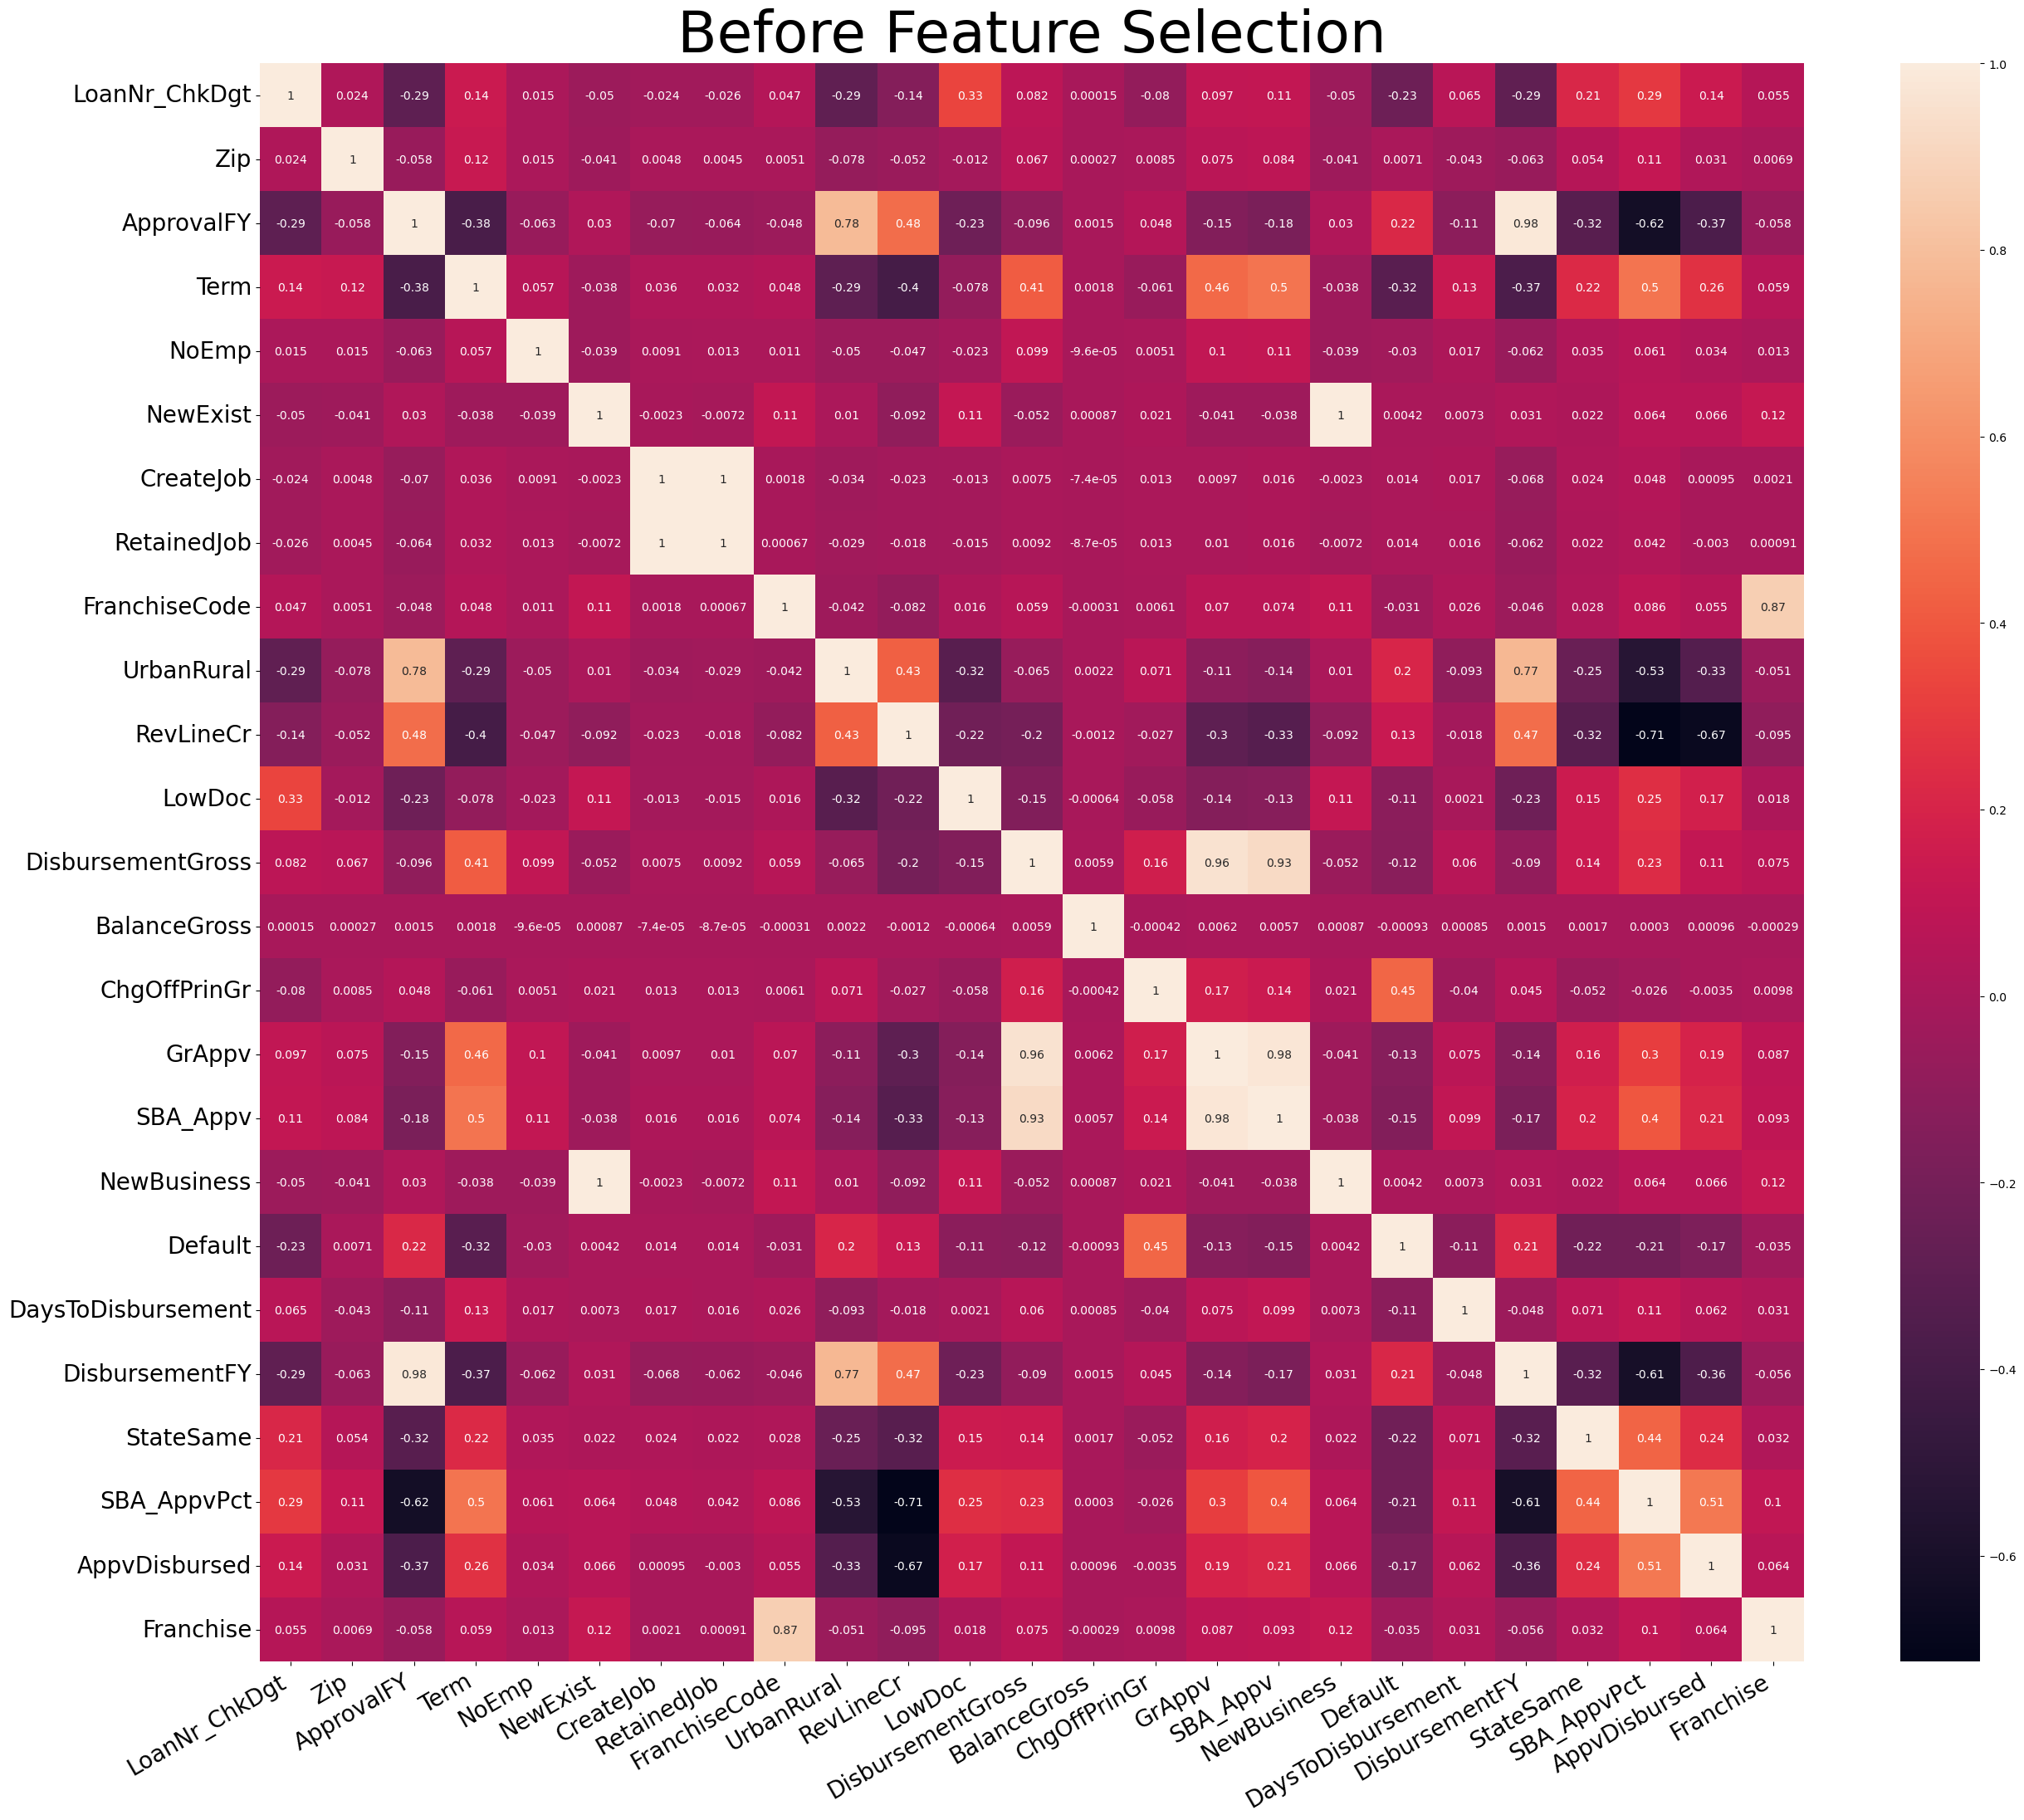

In [115]:
correlation_figure, correlation_axis = plt.subplots(figsize = (30,25))
corr_mtrx = df.corr()
correlation_axis = sns.heatmap(corr_mtrx, annot= True)

plt.title("Before Feature Selection", fontsize = 50)
plt.xticks(rotation = 30, horizontalalignment = 'right', fontsize = 20)
plt.yticks(fontsize = 20)
plt.show()

In [116]:
df1.drop(columns=['LoanNr_ChkDgt', 'Name', 'City', 'Zip', 'Bank', 'NAICS', 'ApprovalDate', 'NewExist', 'FranchiseCode',
                       'DisbursementDate', 'BalanceGross', 'ChgOffPrinGr', 'SBA_Appv', 'MIS_Status','RetainedJob' ], inplace=True)

In [117]:
df1.drop(columns=['ApprovalFY','GrAppv','industri','State', 'BankState'  ], inplace=True)

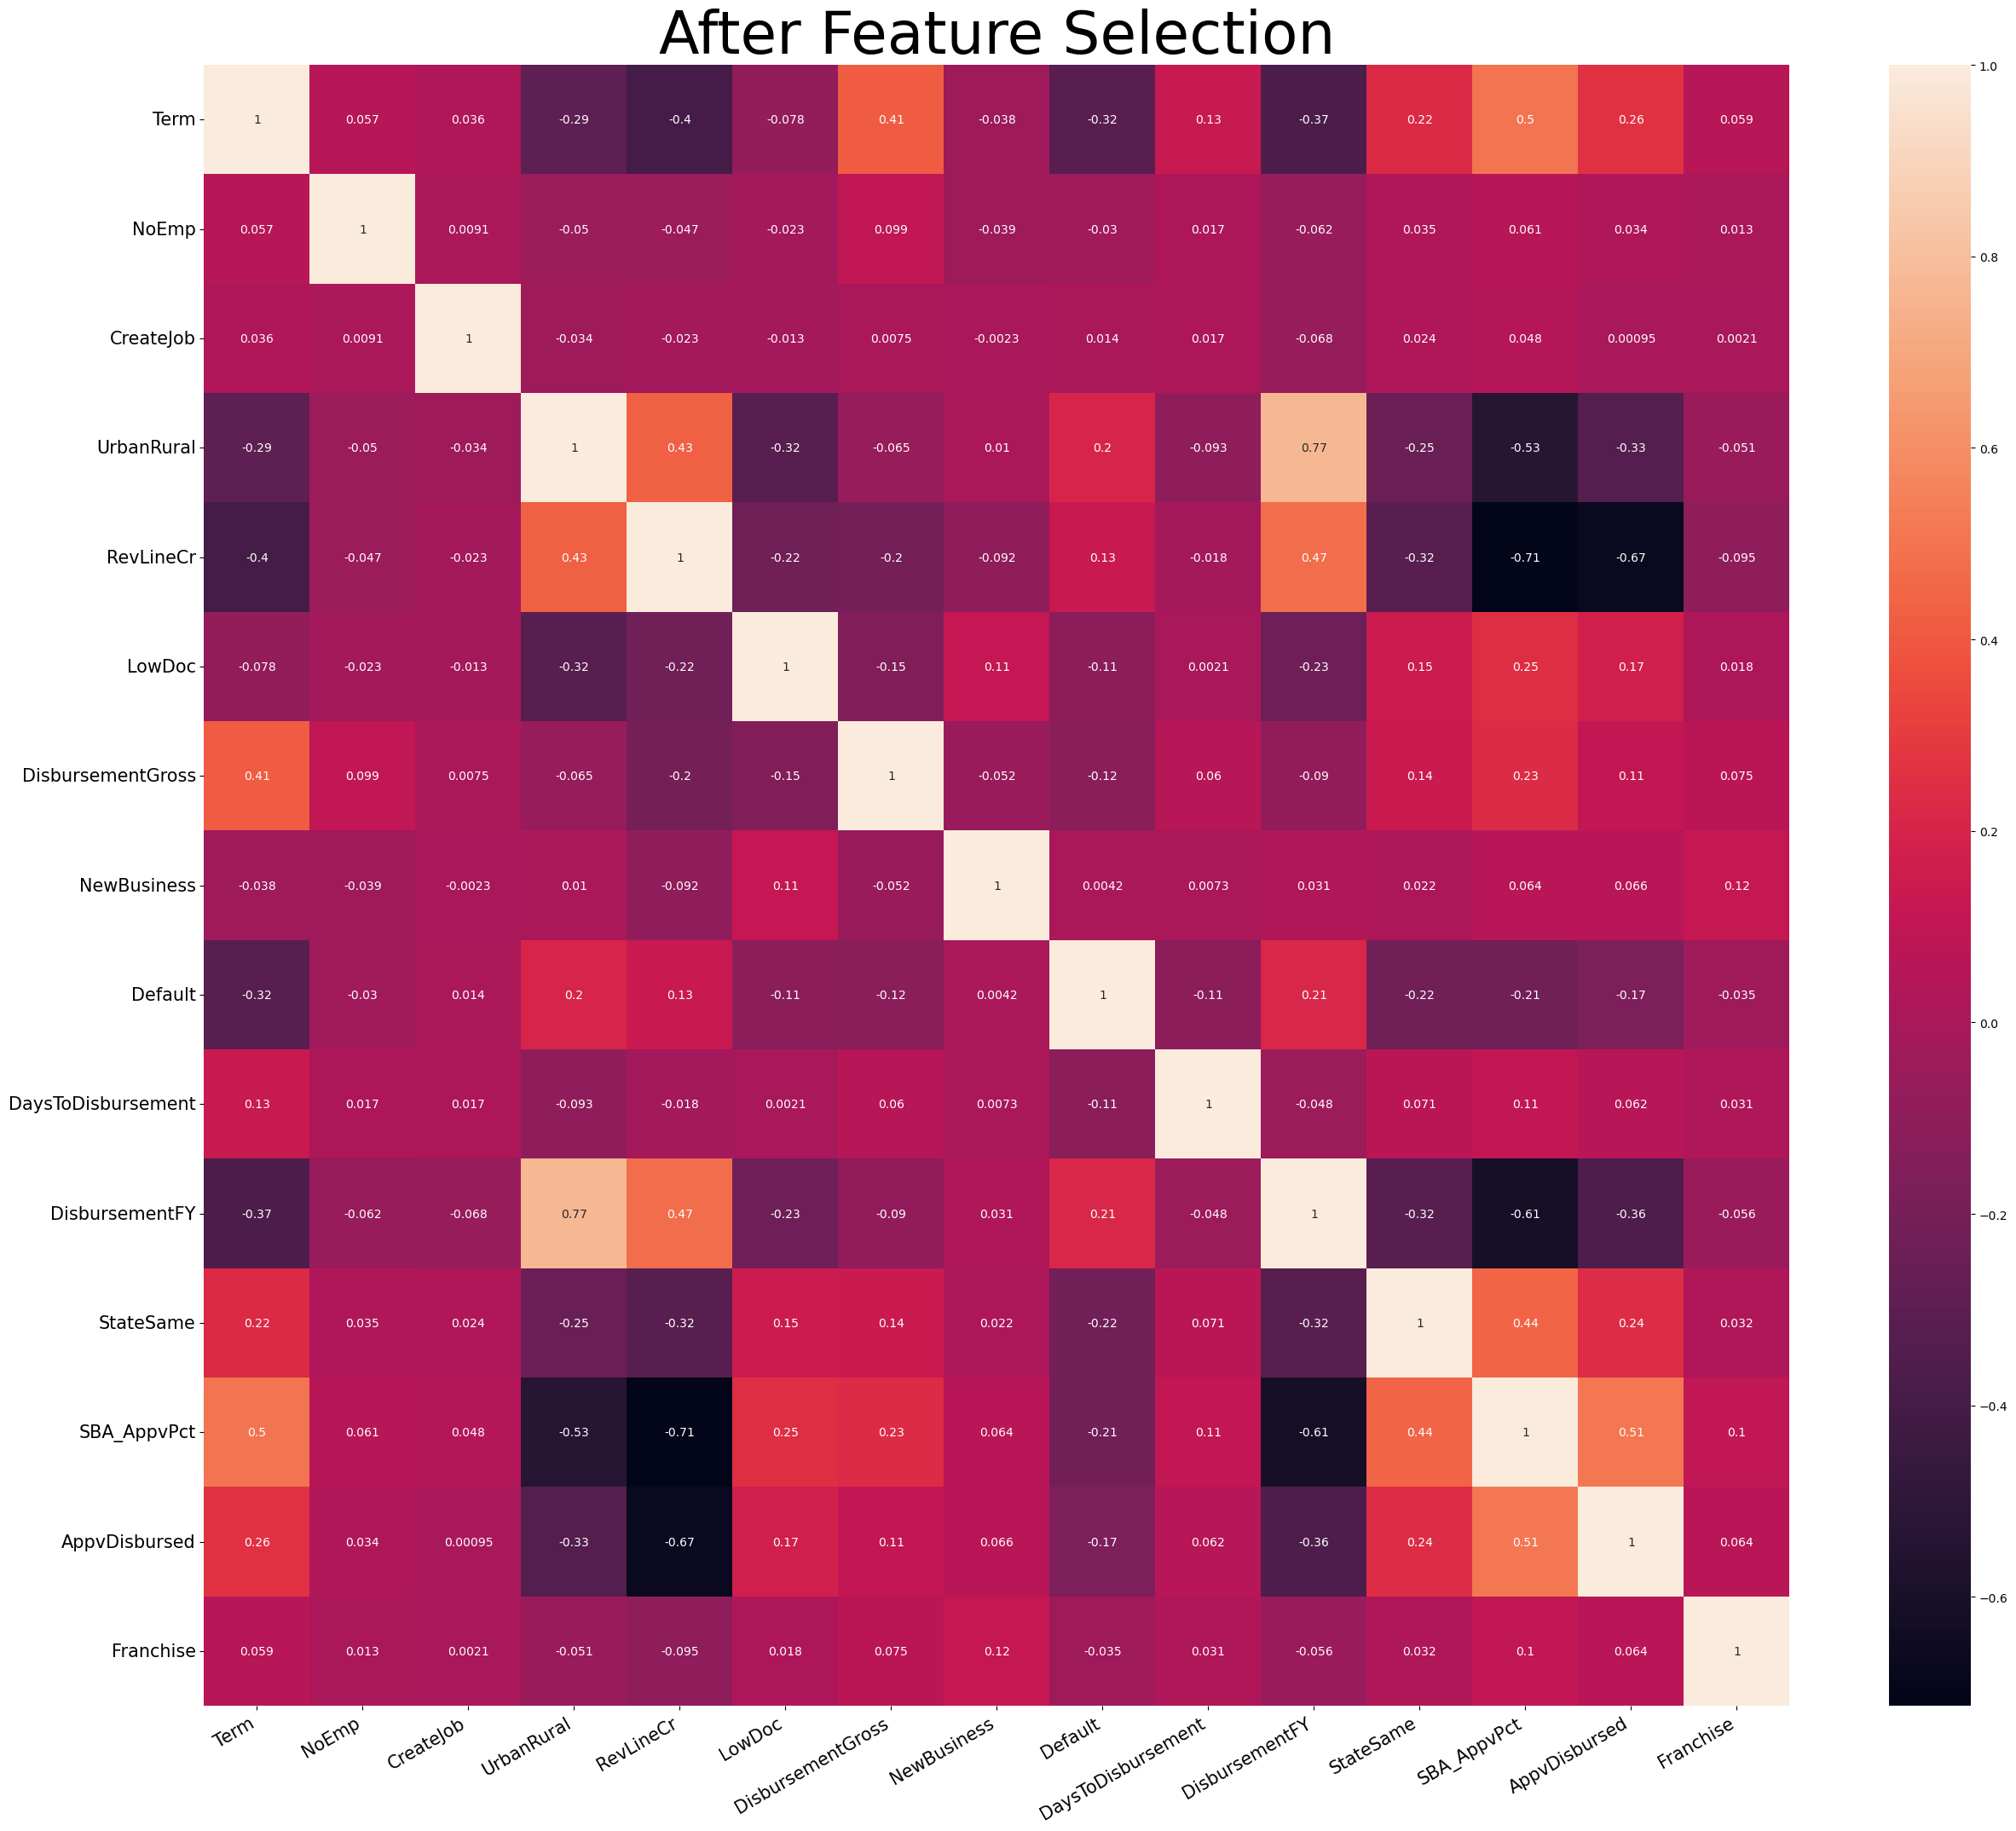

In [118]:
correlation_figure, correlation_axis = plt.subplots(figsize = (30,25))
corr_mtrx = df1.corr()
correlation_axis = sns.heatmap(corr_mtrx, annot= True)

plt.title("After Feature Selection", fontsize = 50)
plt.xticks(rotation = 30, horizontalalignment = 'right', fontsize = 15)
plt.yticks(fontsize = 15)
plt.show()

In [119]:
df1.sample(5)

,Term,NoEmp,CreateJob,UrbanRural,RevLineCr,LowDoc,DisbursementGross,NewBusiness,Default,DaysToDisbursement,DisbursementFY,StateSame,SBA_AppvPct,AppvDisbursed,Franchise
508678,84,3,0,1,1,0,22284.0,0,0,468,2002,0,0.5,0,0
315739,12,1,0,1,1,0,146500.0,0,0,27,2008,0,0.5,0,0
522616,120,26,0,0,0,0,90000.0,0,0,37,1992,1,0.8,1,0
177904,84,1,0,1,0,0,75000.0,0,0,50,2007,0,0.5,1,0
304082,240,2,7,1,0,0,226000.0,0,0,162,2000,1,1.0,1,0


In [120]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 609617 entries, 0 to 899163
Data columns (total 15 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   Term                609617 non-null  int64  
 1   NoEmp               609617 non-null  int64  
 2   CreateJob           609617 non-null  int64  
 3   UrbanRural          609617 non-null  int64  
 4   RevLineCr           609617 non-null  int64  
 5   LowDoc              609617 non-null  int64  
 6   DisbursementGross   609617 non-null  float64
 7   NewBusiness         609617 non-null  int64  
 8   Default             609617 non-null  int64  
 9   DaysToDisbursement  609617 non-null  int64  
 10  DisbursementFY      609617 non-null  int64  
 11  StateSame           609617 non-null  int64  
 12  SBA_AppvPct         609617 non-null  float64
 13  AppvDisbursed       609617 non-null  int64  
 14  Franchise           609617 non-null  int64  
dtypes: float64(2), int64(13)
memory us

## Feature Transformation

In [121]:
## bandingkan metode log transformation dengan boxcox berdasarkan nilai skewnes

print('Nilai skew log transform', (np.log(df1['Term'])).skew())
print('Nilai skew boxcox transform', pd.Series(st.boxcox(df1['Term'])[0]).skew())

## karna angkanya lebih bagus boxcox maka akan digunakan metode boxcox

Nilai skew log transform -1.1493926613879553
Nilai skew boxcox transform 0.02376689851086981


In [122]:
df1['Term_bc'] = st.boxcox(df1['Term'])[0]
df1['DisbursementGross_bc'] = st.boxcox(df1['DisbursementGross'])[0]

In [123]:
## Melihat nilai skew sebelum dan sesudah transform
print('Nilai skew sebelum transformation', df1['Term'].skew())
print('Nilai skew sebelum transformation', df1['DisbursementGross'].skew())
print('Nilai skew sesudah transformation', df1['Term_bc'].skew())
print('Nilai skew sesudah transformation', df1['DisbursementGross_bc'].skew())

Nilai skew sebelum transformation 1.1858527369708123
Nilai skew sebelum transformation 4.73423672016642
Nilai skew sesudah transformation 0.02376689851086981
Nilai skew sesudah transformation 0.00201156855115878


In [124]:
features_transform = ['Term','DisbursementGross', 'Term_bc', 'DisbursementGross_bc']

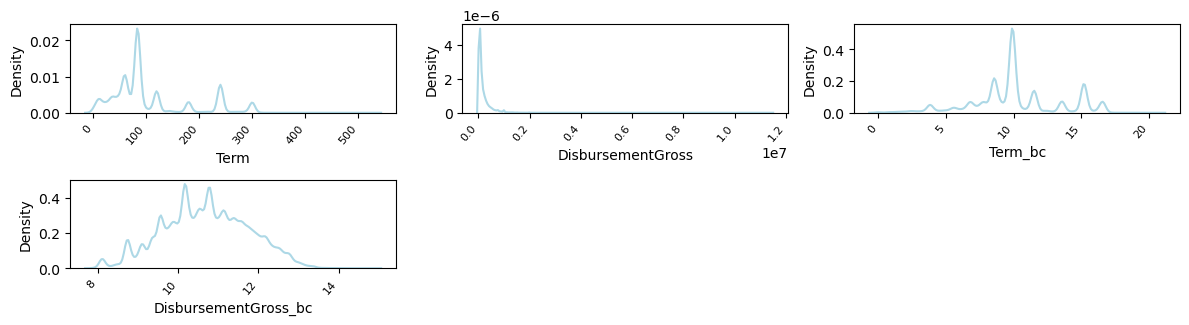

In [125]:
features = features_transform
plt.figure(figsize=(12,6))

for i in range(0, len(features)):
  plt.subplot(4,3, i+1)
  sns.kdeplot(df1[features[i]], color='lightblue')
  plt.xlabel(features[i])
  plt.xticks(rotation=50, horizontalalignment='right', fontsize=8)
  plt.tight_layout()

In [126]:
## drop Term dan DisbursementGross karna sudah diganti
df1 = df1.drop(['Term', 'DisbursementGross'], axis=1)

In [135]:
df1.describe()

,NoEmp,CreateJob,UrbanRural,RevLineCr,LowDoc,NewBusiness,Default,DaysToDisbursement,DisbursementFY,StateSame,SBA_AppvPct,AppvDisbursed,Franchise,Term_bc,DisbursementGross_bc
count,609617.000000,609617.000000,609617.000000,609617.000000,609617.000000,609617.000000,609617.000000,609617.000000,609617.000000,609617.000000,609617.000000,609617.000000,609617.000000,609617.000000,609617.000000
mean,11.981488,11.110835,0.692194,0.324272,0.093578,0.270650,0.180482,119.568450,2000.769824,0.525535,0.698589,0.707352,0.042102,10.126127,10.698835
std,75.457805,285.089449,0.652545,0.468103,0.291242,0.444296,0.384589,253.403194,6.617240,0.499348,0.183384,0.454978,0.200822,3.243370,1.058872
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-36496.000000,1973.000000,0.000000,0.050000,0.000000,0.000000,0.000000,7.911259
25%,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,30.000000,1995.000000,0.000000,0.500000,0.000000,0.000000,8.571213,9.977188
50%,4.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,62.000000,2002.000000,1.000000,0.750000,1.000000,0.000000,9.918224,10.707154
75%,11.000000,1.000000,1.000000,1.000000,0.000000,1.000000,0.000000,126.000000,2006.000000,1.000000,0.850000,1.000000,0.000000,11.516619,11.460186
max,9999.000000,8800.000000,2.000000,1.000000,1.000000,1.000000,1.000000,24132.000000,2072.000000,1.000000,1.000000,1.000000,1.000000,20.537492,14.826327


In [128]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 609617 entries, 0 to 899163
Data columns (total 15 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   NoEmp                 609617 non-null  int64  
 1   CreateJob             609617 non-null  int64  
 2   UrbanRural            609617 non-null  int64  
 3   RevLineCr             609617 non-null  int64  
 4   LowDoc                609617 non-null  int64  
 5   NewBusiness           609617 non-null  int64  
 6   Default               609617 non-null  int64  
 7   DaysToDisbursement    609617 non-null  int64  
 8   DisbursementFY        609617 non-null  int64  
 9   StateSame             609617 non-null  int64  
 10  SBA_AppvPct           609617 non-null  float64
 11  AppvDisbursed         609617 non-null  int64  
 12  Franchise             609617 non-null  int64  
 13  Term_bc               609617 non-null  float64
 14  DisbursementGross_bc  609617 non-null  float64
dtype

In [129]:
# Memisahkan features dan target
X = df1.drop(columns=['Default']) # menggunakan semua feature kecuali target
y = df1['Default']

In [130]:
## memisahkan data train dan test
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [131]:
## Standarisasi

from sklearn.preprocessing import StandardScaler
ss = StandardScaler()

numerical_features = X.columns.to_list()
for n in numerical_features:
    scaler = ss.fit(X_train[[n]])
    X_train[n] = scaler.transform(X_train[[n]])
    X_test[n] = scaler.transform(X_test[[n]])

In [132]:
X_train.sample(5)

,NoEmp,CreateJob,UrbanRural,RevLineCr,LowDoc,NewBusiness,DaysToDisbursement,DisbursementFY,StateSame,SBA_AppvPct,AppvDisbursed,Franchise,Term_bc,DisbursementGross_bc
186273,-0.026366,-0.038977,0.470146,1.441936,-0.320737,-0.609153,-0.387619,0.941553,-1.052042,-1.081428,-1.553085,-0.208885,-0.922470,-0.697672
225300,0.013206,-0.038977,0.470146,-0.693512,-0.320737,-0.609153,-0.197520,0.941553,0.950532,0.827079,0.643880,-0.208885,-0.478911,-0.478921
805625,-0.145083,-0.038977,-1.062028,-0.693512,3.117821,1.641624,0.131192,-0.723934,0.950532,1.099723,0.643880,-0.208885,-0.478911,-0.922855
532776,-0.131893,-0.021420,0.470146,1.441936,-0.320737,-0.609153,5.525251,0.790145,-1.052042,-1.081428,0.643880,-0.208885,-0.685614,-1.809168
181126,-0.145083,-0.038977,0.470146,1.441936,-0.320737,-0.609153,-0.355936,0.790145,0.950532,-1.081428,-1.553085,-0.208885,-0.799593,-0.712902


In [151]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score
from sklearn.model_selection import cross_validate


def eval_classification(model):
    y_pred = model.predict(X_test)
    y_pred_train = model.predict(X_train)
    y_pred_proba = model.predict_proba(X_test)
    y_pred_proba_train = model.predict_proba(X_train)
    
    print('Accuracy (Test Set) : %.2f' % accuracy_score(y_test, y_pred))
    print('Precision (Test Set) : %.2f' % precision_score(y_test, y_pred))
    print('Recall (Test Set) : %.2f' % recall_score(y_test, y_pred))
    print('F-1-Score (Test Set) : %.2f' % f1_score(y_test, y_pred))
    
    print('AUC (test-proba) : %.2f' % roc_auc_score(y_test, y_pred_proba[:, 1]))
    print('AUC (train-proba) : %.2f' % roc_auc_score(y_train, y_pred_proba_train[:, 1]))
    
    score = cross_validate(model, X, y, cv=5, scoring='roc_auc', return_train_score=True)
    print('roc_auc (crossval train): '+ str(score['train_score'].mean()))
    print('roc_auc (crossval test): '+ str(score['test_score'].mean()))

def show_feature_importance(model):
    feat_importances = pd.Series(model.feature_importances_, index=X.columns)
    ax = feat_importances.nlargest(25).plot(kind='barh', figsize=(10, 8))
    ax.invert_yaxis()

    plt.xlabel('score')
    plt.ylabel('feature')
    plt.title('feature importance score')

def show_best_hyperparameter(model):
    print(model.best_estimator_.get_params())

## DT

In [134]:
from sklearn.tree import DecisionTreeClassifier
dt = DecisionTreeClassifier(random_state=42)
dt.fit(X_train, y_train)

eval_classification(dt)

Accuracy (Test Set) : 0.93
Precision (Test Set) : 0.80
Recall (Test Set) : 0.80
F-1-Score (Test Set) : 0.80
AUC (test-proba) : 0.88
AUC (train-proba) : 1.00
roc_auc (crossval train): 0.999999990372174
roc_auc (crossval test): 0.6782140098629916


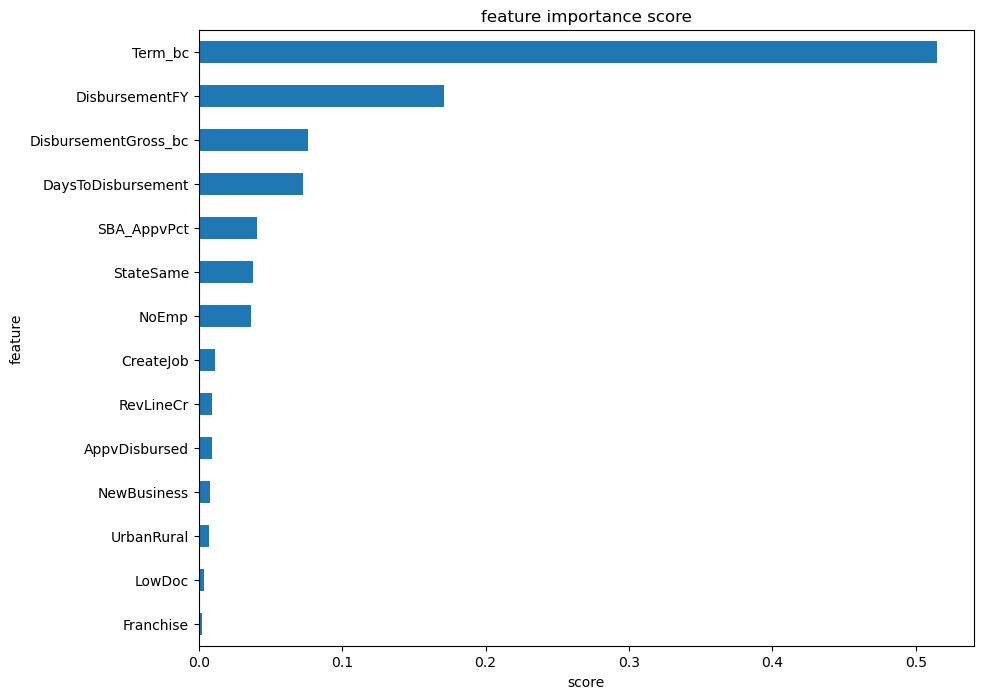

In [179]:
show_feature_importance(dt)

**Overfit**

In [72]:
#Melakukan Tuning Hyperparameter
from sklearn.model_selection import RandomizedSearchCV

# List of hyperparameter
max_depth = [int(x) for x in np.linspace(1, 110, num = 30)] # Maximum number of levels in tree
min_samples_split = [2, 5, 10, 100] # Minimum number of samples required to split a node
min_samples_leaf = [1, 2, 4, 10, 20, 50] # Minimum number of samples required at each leaf node
max_features = ['auto', 'sqrt'] # Number of features to consider at every split

hyperparameters = dict(max_depth=max_depth, 
                       min_samples_split=min_samples_split, 
                       min_samples_leaf=min_samples_leaf,
                       max_features=max_features
                      )
# Inisialisasi Model
dt = DecisionTreeClassifier(random_state=42)
model = RandomizedSearchCV(dt, hyperparameters, random_state=42, cv=5, scoring='roc_auc')
model.fit(X_train, y_train)

# Predict & Evaluation
y_pred = model.predict(X_test) 
eval_classification(model)

Accuracy (Test Set) : 0.93
Precision (Test Set) : 0.85
Recall (Test Set) : 0.77
F-1-Score (Test Set) : 0.80
AUC (test-proba) : 0.95
AUC (train-proba) : 0.97
roc_auc (crossval train): 0.9361231738601916
roc_auc (crossval test): 0.8375189051656623


## RF

In [136]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(random_state=42)
rf.fit(X_train, y_train)

eval_classification(rf)

Accuracy (Test Set) : 0.95
Precision (Test Set) : 0.89
Recall (Test Set) : 0.81
F-1-Score (Test Set) : 0.85
AUC (test-proba) : 0.97
AUC (train-proba) : 1.00
roc_auc (crossval train): 0.9999994513589282
roc_auc (crossval test): 0.8331512734256018


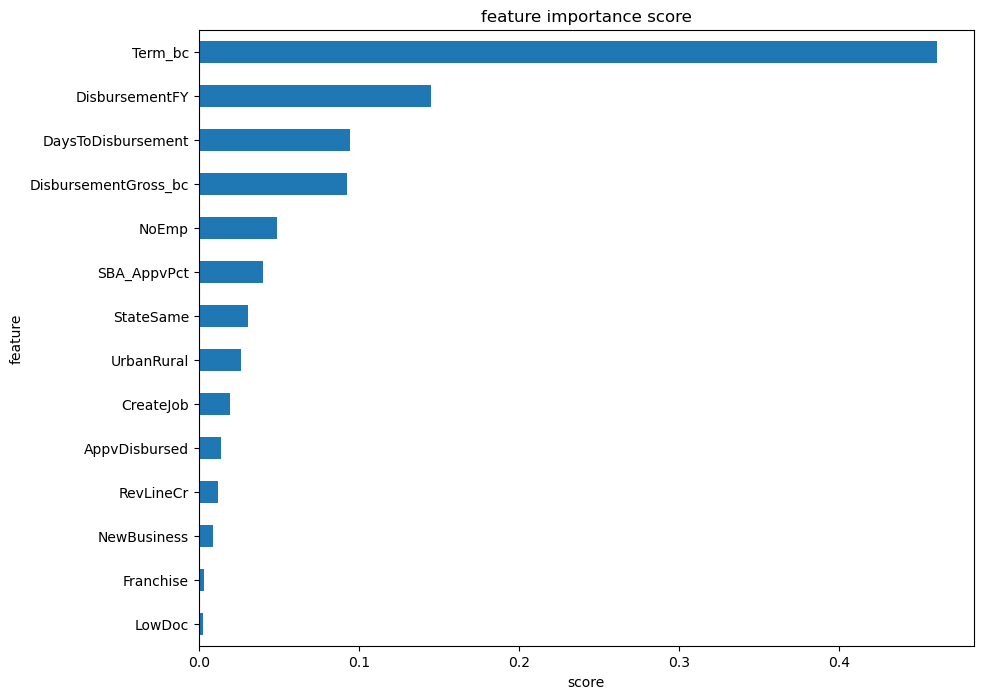

In [180]:
show_feature_importance(rf)

## LR

In [137]:
from sklearn.linear_model import LogisticRegression # import logistic regression dari sklearn

logreg = LogisticRegression() # inisiasi object dengan nama logreg
logreg.fit(X_train, y_train) # fit model regression dari data train
eval_classification(logreg)

Accuracy (Test Set) : 0.85
Precision (Test Set) : 0.68
Recall (Test Set) : 0.32
F-1-Score (Test Set) : 0.43
AUC (test-proba) : 0.84
AUC (train-proba) : 0.84
roc_auc (crossval train): 0.8336278503980656
roc_auc (crossval test): 0.8244497384021692


## XGBOOST

In [138]:
from xgboost import XGBClassifier

xg = XGBClassifier(random_state=42)
xg.fit(X_train, y_train)
eval_classification(xg)

Accuracy (Test Set) : 0.95
Precision (Test Set) : 0.89
Recall (Test Set) : 0.85
F-1-Score (Test Set) : 0.87
AUC (test-proba) : 0.98
AUC (train-proba) : 0.99
roc_auc (crossval train): 0.9879428145253323
roc_auc (crossval test): 0.8104648899067284


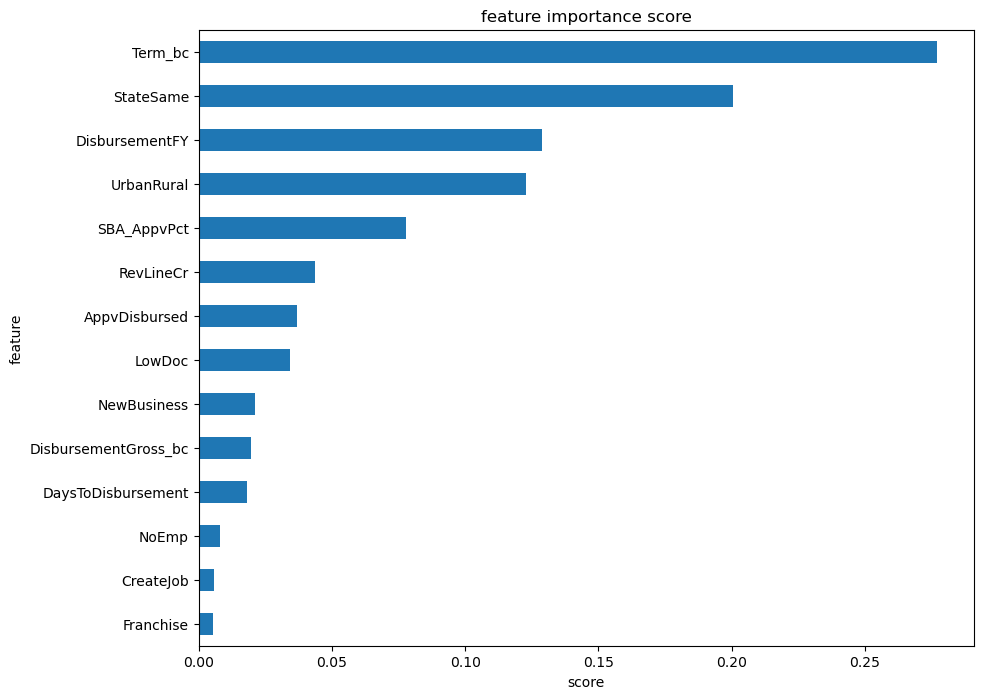

In [182]:
show_feature_importance(xg)

## ADABOOST

In [139]:
from sklearn.ensemble import AdaBoostClassifier

abc = AdaBoostClassifier(random_state=42)
abc.fit(X_train, y_train)
eval_classification(abc)

Accuracy (Test Set) : 0.92
Precision (Test Set) : 0.82
Recall (Test Set) : 0.72
F-1-Score (Test Set) : 0.77
AUC (test-proba) : 0.95
AUC (train-proba) : 0.96
roc_auc (crossval train): 0.961169454233708
roc_auc (crossval test): 0.8816879216336373


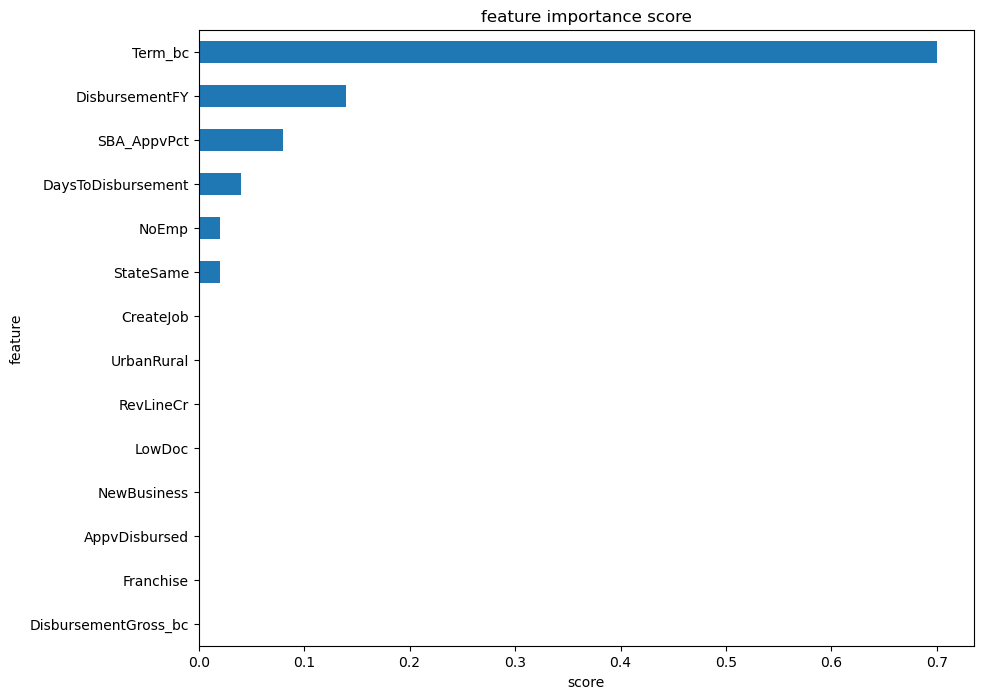

In [183]:
show_feature_importance(abc)

## GradientBoost

In [140]:
from sklearn.ensemble import GradientBoostingClassifier

gbc = GradientBoostingClassifier()
gbc.fit(X_train, y_train)
eval_classification(gbc)

Accuracy (Test Set) : 0.94
Precision (Test Set) : 0.87
Recall (Test Set) : 0.78
F-1-Score (Test Set) : 0.83
AUC (test-proba) : 0.97
AUC (train-proba) : 0.97
roc_auc (crossval train): 0.973194078990911
roc_auc (crossval test): 0.9061805571177504


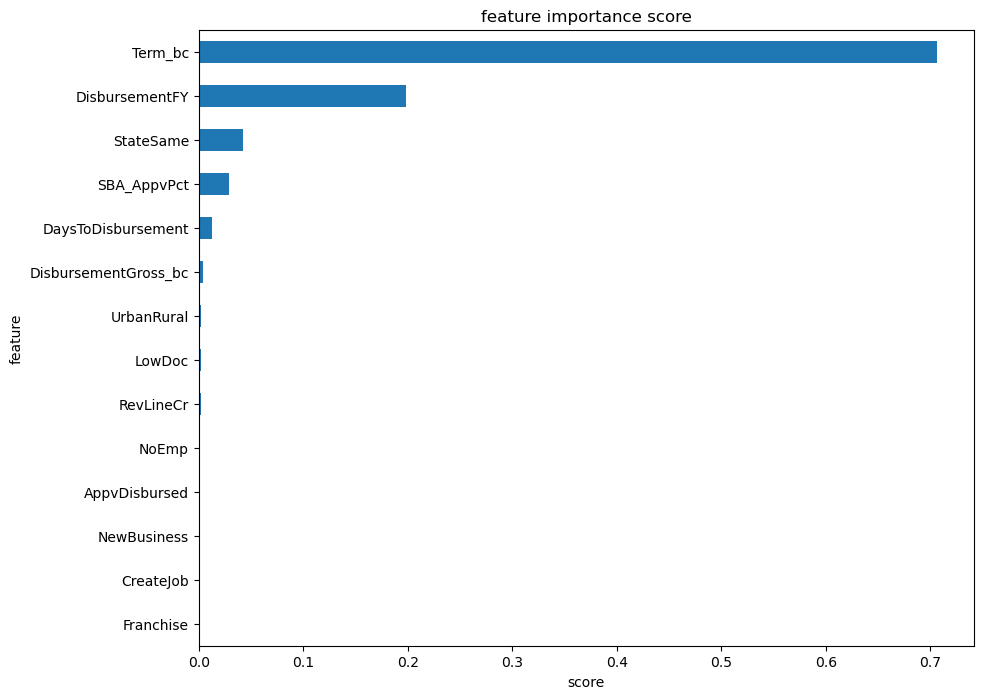

In [184]:
show_feature_importance(gbc)

# BATAS RIFKI

In [ ]:
from sklearn.model_selection import cross_val_score, KFold
from sklearn.linear_model import LinearRegression

# Select features and target variable
X = df1.drop('Default', axis=1)
y = df1['Default']

# Split dataset using K-fold cross-validation
kf = KFold(n_splits=5, shuffle=True, random_state=42)
train_scores = []
test_scores = []

for train_index, test_index in kf.split(X):
    X_train, X_test = X.iloc[train_index], X.iloc[test_index]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]
    
    # Initialize logistic regression model
    model = LinearRegression()
    
    # Train model
    model.fit(X_train, y_train)
    
    # Evaluate model
    train_score = model.score(X_train, y_train)
    test_score = model.score(X_test, y_test)
    
    train_scores.append(train_score)
    test_scores.append(test_score)

# Combine data training and testing
train = pd.concat([X, y], axis=1)
test = pd.DataFrame({'train_score': train_scores, 'test_score': test_scores})

# Save training data to CSV file
train.to_csv('train.csv', index=False)

# Save testing data to CSV file
test.to_csv('test.csv', index=False)

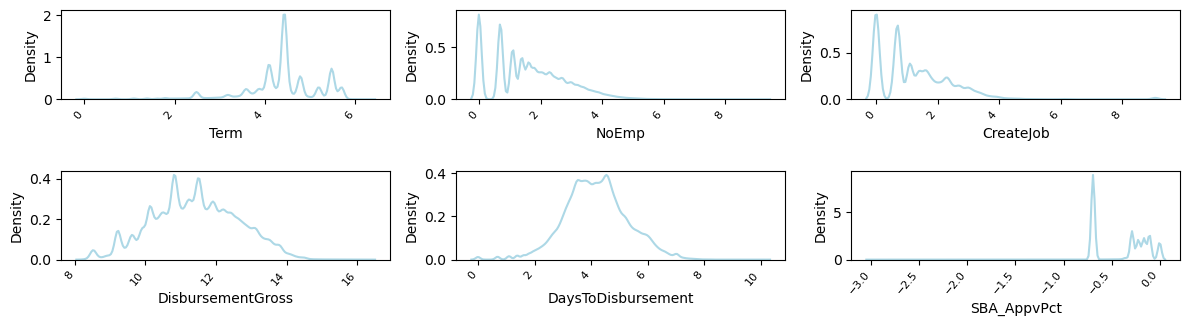

In [66]:
features = num_cols
plt.figure(figsize=(12,6))

for i in range(0, len(features)):
  plt.subplot(4,3, i+1)
  sns.kdeplot(np.log(dftr[features[i]]), color='lightblue')
  plt.xlabel(features[i])
  plt.xticks(rotation=50, horizontalalignment='right', fontsize=8)
  plt.tight_layout()

In [60]:
dftr['Term_log'] = np.log(dftr['Term'])
dftr['CreateJob_log'] = np.log(dftr['CreateJob'])
dftr['DisbursementGross_log'] = np.log(dftr['DisbursementGross'])
dftr['DaysToDisbursement_log'] = np.log(dftr['DaysToDisbursement'])
dftr['NoEmp_log'] = np.log(dftr['NoEmp'])
dftr['SBA_AppvPct_log'] = np.log(dftr['SBA_AppvPct'])

In [61]:
dftr.head()

,Term,NoEmp,CreateJob,UrbanRural,RevLineCr,LowDoc,DisbursementGross,NewBusiness,DaysToDisbursement,DisbursementFY,...,SBA_AppvPct,AppvDisbursed,Franchise,Default,Term_log,CreateJob_log,DisbursementGross_log,DaysToDisbursement_log,NoEmp_log,SBA_AppvPct_log
0,84,4,0,0,0,1,60000.0,1,730,1999,...,0.80,1,0,0,4.430817,-inf,11.002100,6.593045,1.386294,-0.223144
1,60,2,0,0,0,1,40000.0,1,92,1997,...,0.80,1,0,0,4.094345,-inf,10.596635,4.521789,0.693147,-0.223144
2,180,7,0,0,0,0,287000.0,0,306,1997,...,0.75,1,0,0,5.192957,-inf,12.567237,5.723585,1.945910,-0.287682
3,60,2,0,0,0,1,35000.0,0,122,1997,...,0.80,1,0,0,4.094345,-inf,10.463103,4.804021,0.693147,-0.223144
4,240,14,7,0,0,0,229000.0,0,75,1997,...,1.00,1,0,0,5.480639,1.94591,12.341477,4.317488,2.639057,0.000000


In [121]:
dftr = dftr.drop(columns=['Term', 'NoEmp', 'CreateJob',
       'DisbursementGross',  'DaysToDisbursement',
       'SBA_AppvPct'])

In [122]:
dftr.head()

,UrbanRural,RevLineCr,LowDoc,NewBusiness,DisbursementFY,StateSame,AppvDisbursed,Franchise,Default,Term_log,CreateJob_log,DisbursementGross_log,DaysToDisbursement_log,NoEmp_log,SBA_AppvPct_log
0,0,0,1,1,1999,0,1,0,0,4.430817,-inf,11.002100,6.593045,1.386294,-0.223144
1,0,0,1,1,1997,1,1,0,0,4.094345,-inf,10.596635,4.521789,0.693147,-0.223144
2,0,0,0,0,1997,1,1,0,0,5.192957,-inf,12.567237,5.723585,1.945910,-0.287682
3,0,0,1,0,1997,1,1,0,0,4.094345,-inf,10.463103,4.804021,0.693147,-0.223144
4,0,0,0,0,1997,1,1,0,0,5.480639,1.94591,12.341477,4.317488,2.639057,0.000000


# --Modelling Classification--

## Standarization data Train dan Test

In [128]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [130]:
from sklearn.preprocessing import StandardScaler
ss = StandardScaler()

numerical_features = X.columns.to_list()
for n in numerical_features:
    scaler = ss.fit(X_train[[n]])
    X_train[n] = scaler.transform(X_train[[n]])
    X_test[n] = scaler.transform(X_test[[n]])

In [131]:
X_train.head()

,Term,NoEmp,CreateJob,UrbanRural,RevLineCr,LowDoc,DisbursementGross,NewBusiness,DaysToDisbursement,DisbursementFY,StateSame,SBA_AppvPct,AppvDisbursed,Franchise
573159,1.785734,-0.131893,-0.038977,-1.062028,-0.693512,-0.320737,-0.282890,1.641624,0.202480,-1.178158,0.950532,1.099723,0.643880,-0.208885
260248,-0.612236,-0.105511,-0.038977,0.470146,1.441936,-0.320737,-0.507146,-0.609153,-0.439104,0.941553,-1.052042,-1.081428,-1.553085,-0.208885
890789,-0.281024,-0.079129,-0.038977,2.002320,1.441936,-0.320737,-0.579048,-0.609153,-0.363857,0.790145,-1.052042,-1.081428,0.643880,-0.208885
582716,-0.281024,-0.026366,-0.038977,-1.062028,-0.693512,-0.320737,-0.279141,-0.609153,-0.015342,-1.178158,-1.052042,0.990665,0.643880,-0.208885
92374,1.785734,0.026397,0.038272,-1.062028,-0.693512,-0.320737,2.168855,-0.609153,0.832182,-0.421118,0.950532,1.645010,0.643880,-0.208885


In [135]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score
from sklearn.model_selection import cross_validate
from sklearn.ensemble import RandomForestClassifier


def eval_classification(model):
    y_pred = model.predict(X_test)
    y_pred_train = model.predict(X_train)
    y_pred_proba = model.predict_proba(X_test)
    y_pred_proba_train = model.predict_proba(X_train)
    
    print('Accuracy (Test Set) : %.2f' % accuracy_score(y_test, y_pred))
    print('Precision (Test Set) : %.2f' % precision_score(y_test, y_pred))
    print('Recall (Test Set) : %.2f' % recall_score(y_test, y_pred))
    print('F-1-Score (Test Set) : %.2f' % f1_score(y_test, y_pred))
    
    print('AUC (test-proba) : %.2f' % roc_auc_score(y_test, y_pred_proba[:, 1]))
    print('AUC (train-proba) : %.2f' % roc_auc_score(y_train, y_pred_proba_train[:, 1]))
    
    score = cross_validate(model, X, y, cv=5, scoring='roc_auc', return_train_score=True)
    print('roc_auc (crossval train): '+ str(score['train_score'].mean()))
    print('roc_auc (crossval test): '+ str(score['test_score'].mean()))

def show_feature_importance(model):
    feat_importances = pd.Series(model.feature_importances_, index=X.columns)
    ax = feat_importances.nlargest(25).plot(kind='barh', figsize=(10, 8))
    ax.invert_yaxis()

    plt.xlabel('score')
    plt.ylabel('feature')
    plt.title('feature importance score')

def show_best_hyperparameter(model):
    print(model.best_estimator_.get_params())


In [136]:
import numpy as np
from matplotlib import pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier

def draw_learning_curve(param_values):
    train_scores = []
    test_scores = []

    for c in param_values:
        model = LogisticRegression(penalty='l2', C=c)
        model.fit(X_train, y_train)

        # eval on train
        y_pred_train_proba = model.predict_proba(X_train)
        train_auc = roc_auc_score(y_train, y_pred_train_proba[:,1])
        train_scores.append(train_auc)

        # eval on test
        y_pred_proba = model.predict_proba(X_test)
        test_auc = roc_auc_score(y_test, y_pred_proba[:,1])
        test_scores.append(test_auc)

        print('param value: ' + str(c) + '; train: ' + str(train_auc) + '; test: '+ str(test_auc))

    plt.plot(param_values, train_scores, label='Train')
    plt.plot(param_values, test_scores, label='Test')
    plt.xlabel('C')
    plt.ylabel('AUC')
    plt.title('Learning Curve - Hyperparameter C - Logistic Regression')
    plt.legend()
    plt.show()

In [137]:
df.Default.value_counts(normalize=True)

0    0.819518
1    0.180482
Name: Default, dtype: float64

## Logistic Regression

In [138]:
from sklearn.linear_model import LogisticRegression # import logistic regression dari sklearn
logreg = LogisticRegression() # inisiasi object dengan nama logreg
logreg.fit(X_train, y_train) # fit model regression dari data train
eval_classification(logreg)

Accuracy (Test Set) : 0.86
Precision (Test Set) : 0.73
Recall (Test Set) : 0.33
F-1-Score (Test Set) : 0.45
AUC (test-proba) : 0.85
AUC (train-proba) : 0.85
roc_auc (crossval train): 0.8259777457848166
roc_auc (crossval test): 0.8219915885730714


In [139]:
X.columns

Index(['Term', 'NoEmp', 'CreateJob', 'UrbanRural', 'RevLineCr', 'LowDoc',
       'DisbursementGross', 'NewBusiness', 'DaysToDisbursement',
       'DisbursementFY', 'StateSame', 'SBA_AppvPct', 'AppvDisbursed',
       'Franchise'],
      dtype='object')

In [140]:
logreg.coef_

array([[-2.06974196e+00, -5.18505258e-01,  1.36203211e-01,
         1.73395430e-01, -4.23128412e-01, -4.23941026e-01,
        -4.06845898e-02,  3.84121868e-02, -5.64278081e-01,
         1.33220895e-01, -4.65860766e-01,  2.10080617e-01,
        -3.44047339e-01, -1.96905584e-03]])

In [141]:
X_test.head()

,Term,NoEmp,CreateJob,UrbanRural,RevLineCr,LowDoc,DisbursementGross,NewBusiness,DaysToDisbursement,DisbursementFY,StateSame,SBA_AppvPct,AppvDisbursed,Franchise
284579,-0.625484,-0.118702,-0.035465,0.470146,1.441936,-0.320737,-0.391044,-0.609153,-0.336134,1.092961,-1.052042,-1.081428,-1.553085,-0.208885
662272,-0.281024,-0.145083,-0.031954,0.470146,1.441936,-0.320737,-0.654025,-0.609153,2.467826,0.638737,-1.052042,-1.081428,0.643880,-0.208885
780478,-0.837459,-0.145083,-0.038977,-1.062028,-0.693512,3.117821,-0.507820,-0.609153,-0.423263,-0.875342,0.950532,1.099723,0.643880,-0.208885
632782,1.785734,-0.039557,-0.021420,-1.062028,-0.693512,-0.320737,-0.069205,-0.609153,-0.201481,-1.026750,0.950532,1.645010,0.643880,-0.208885
475152,-0.757969,-0.118702,-0.035465,0.470146,1.441936,-0.320737,-0.095327,-0.609153,0.075747,0.033105,-1.052042,-1.081428,-1.553085,-0.208885


In [142]:
logreg.predict(X_test)

array([0, 0, 0, ..., 0, 0, 0])

In [143]:
logreg.predict_proba(X_test)

array([[0.63017399, 0.36982601],
       [0.97390664, 0.02609336],
       [0.91211557, 0.08788443],
       ...,
       [0.79981887, 0.20018113],
       [0.99754159, 0.00245841],
       [0.94634158, 0.05365842]])

## Tuning Hyperparameter

In [ ]:
from sklearn.model_selection import RandomizedSearchCV

penalty = ['l1', 'l2']
C = [float(x)for x in np.linspace(0.0001, 0.05, 100)]
hyperparameters = dict(penalty=penalty, C=C)

logreg = LogisticRegression()
rs = RandomizedSearchCV(logreg, hyperparameters, scoring='roc_auc', random_state=42, cv=5)
rs.fit(X_train, y_train)
eval_classification(rs)

Accuracy (Test Set) : 0.86
Precision (Test Set) : 0.73
Recall (Test Set) : 0.32
F-1-Score (Test Set) : 0.45
AUC (test-proba) : 0.85
AUC (train-proba) : 0.85


## Check the best hyperparameter after tuning

In [ ]:
show_best_hyperparameter(rs)

## Learning Curve

In [ ]:
# learning curve
import numpy as np
param_values = [float(x) for x in np.linspace(0.0001, 0.05, 100)]
draw_learning_curve(param_values)

<br/><br/><br/>


---
## k-Nearest Neighbor ; kurang cocok untuk dataset yg barisnya banyak sehingga tidak dimodelkan

<br/><br/><br/>


---
## Decision Tree

### Fit Model

In [ ]:
# decision tree
from sklearn.tree import DecisionTreeClassifier # import decision tree dari sklearn
dt = DecisionTreeClassifier() # inisiasi object dengan nama dt
dt.fit(X_train, y_train) # fit model decision tree dari data train
eval_classification(dt)

## Hyperparameter Tuning

In [ ]:
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV
from scipy.stats import uniform
import numpy as np

# List of hyperparameter
max_depth = [int(x) for x in np.linspace(1, 110, num = 30)] # Maximum number of levels in tree
min_samples_split = [2, 5, 10, 100] # Minimum number of samples required to split a node
min_samples_leaf = [1, 2, 4, 10, 20, 50] # Minimum number of samples required at each leaf node
max_features = ['auto', 'sqrt'] # Number of features to consider at every split
criterion = ['gini','entropy']
splitter = ['best','random']

hyperparameters = dict(max_depth=max_depth, 
                       min_samples_split=min_samples_split, 
                       min_samples_leaf=min_samples_leaf,
                       max_features=max_features,
                       criterion=criterion,
                       splitter=splitter
                      )

# Inisialisasi Model
dt = DecisionTreeClassifier(random_state=42)
model = RandomizedSearchCV(dt, hyperparameters, cv=5, scoring='precision')
model.fit(X_train, y_train)

# Predict & Evaluation
y_pred = model.predict(X_test)#Check performa dari model
eval_classification(model)

### Feature Importance

In [ ]:
show_feature_importance(model.best_estimator_)

In [ ]:
#X = dftr.drop(['Default'], axis=1)
#y = dftr.['Default']

In [ ]:
#y.value_counts()

In [ ]:
#y.value_counts().plot.pie(autopct='%.2f')

In [ ]:
#from imblearn import over_sampling
#X_over_smote, y_over_smote = over_sampling.SMOTE().fit_resample(X, y)

In [ ]:
#y_over_smote.value_counts().plot.pie(autopct='%.2f')

In [ ]:
#y_over_smote.value_counts()

In [ ]:
#dftr.shape